# ohlcv

In [1]:
import vectorbt as vbt

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from numba import njit, f8, i8, b1, optional

In [3]:
print(vbt.defaults.ohlcv['column_names'])

{'open': 'Open', 'high': 'High', 'low': 'Low', 'close': 'Close', 'volume': 'Volume'}


In [12]:
try:
    pd.DataFrame([1, 2, 3]).vbt.ohlcv.plot()
except Exception as e:
    print(e) # couldn't find default column names

'open'


In [13]:
ohlcv_ts = pd.DataFrame({
    'open': [1, 2, 3], 
    'high': [1, 2, 3], 
    'low': [1, 2, 3], 
    'close': [1, 2, 3], 
    'volume': [1, 2, 3]
})

In [14]:
ohlcv_ts = pd.DataFrame(
    columns=['open', 'high', 'low', 'close', 'volume'],
    index=[datetime(2018, 1, 1) + timedelta(days=i) for i in range(10)]
)
ohlcv_ts['open'] = np.cumsum(np.random.uniform(-0.8, 1, size=(10,)))
ohlcv_ts['close'] = ohlcv_ts['open'] + np.random.uniform(-1, 1, size=(10,))
ohlcv_ts['high'] = ohlcv_ts['open'] + np.random.uniform(0, 1, size=(10,))
ohlcv_ts['low'] = ohlcv_ts['open'] - np.random.uniform(0, 1, size=(10,))
ohlcv_ts['volume'] = np.cumsum(np.random.uniform(-1, 1, size=(10,)))

print(ohlcv_ts)

                open      high       low     close    volume
2018-01-01  0.900412  1.834633  0.763191  0.928077  0.401673
2018-01-02  1.779988  2.306806  1.455935  1.879702  0.267193
2018-01-03  2.757924  3.423483  2.357172  3.705986  0.039502
2018-01-04  3.755997  3.893722  3.009722  4.050060  0.604917
2018-01-05  4.194757  5.034820  3.921504  3.583851  0.976425
2018-01-06  4.374964  5.343257  3.485582  4.764929  1.898399
2018-01-07  3.901715  4.826196  3.745241  4.001452  2.552434
2018-01-08  3.976458  4.296720  3.522851  3.386251  3.026456
2018-01-09  3.509790  4.134953  2.958752  3.334686  3.765387
2018-01-10  3.261742  3.374881  2.284923  4.090490  4.724768


In [15]:
try:
    ohlcv_ts.vbt.ohlcv.plot()
except Exception as e:
    print(e) # still couldn't find default column names

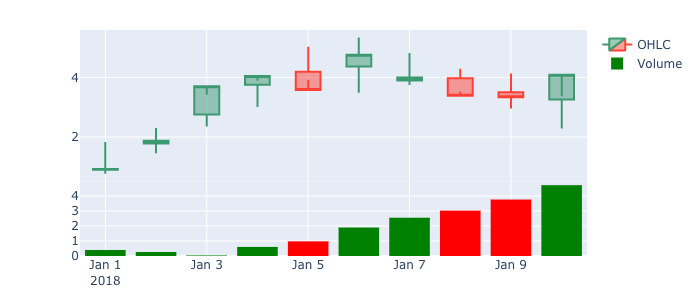

In [16]:
# Specify them manually
ohlcv_ts.vbt.ohlcv(column_names={
    'open': 'open', 
    'high': 'high', 
    'low': 'low', 
    'close': 'close', 
    'volume': 'volume'
}).plot().show_png()

In [17]:
# Or by changing the defaults
vbt.defaults.ohlcv['column_names'] = {
    'open': 'open', 
    'high': 'high', 
    'low': 'low', 
    'close': 'close', 
    'volume': 'volume'
}

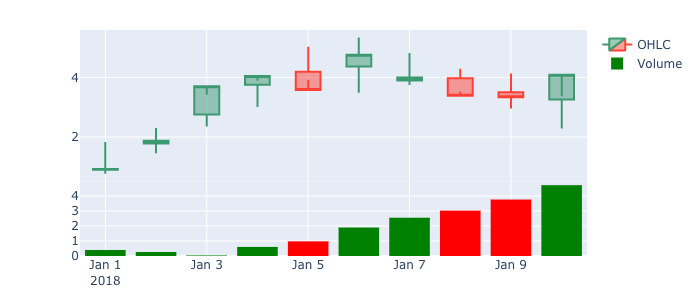

In [18]:
ohlcv_ts.vbt.ohlcv.plot().show_png()